<div style="text-align: center;">
    <table style="width: 100%; table-layout: fixed;">
        <tr>
            <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/michau_segment.jpg?raw=1" alt="Image 1" style="width: 90%"/></td>
            <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/michau.png?raw=1" alt="Image 2" style="width: 90%;"/></td>
        </tr>
    </table>
   <p style="text-align: center; font-style: italic">Michał Miziołek na Majorce przed, i po segmentacji</p>
</div>


# **Segmentacja Zdjęć 2D**

## Wstęp <a name="wstep" id="wstep"></a>

Segmentacja obrazu to proces podziału obrazu na obszary, które zawierają podobne cechy, a dokładniej proces przypisywania każdemu pikselowi obrazu etykiety, która wskazuje, do jakiego regionu lub obiektu należy dany piksel. Regiony te są definiowane na podstawie cech takich jak kolor, tekstura, intensywność czy geometria.


### Wykorzystanie:
1. **Medycyna:**
   - Analiza obrazów medycznych (MRI, CT).
   - Wyodrębnianie narządów lub zmian chorobowych.
   - Precyzyjne diagnozowanie na podstawie obrazów.

1. **Motoryzacja i systemy autonomiczne:**
   - Wykrywanie przeszkód i ścieżek.
   - Segmentacja dróg, znaków, pieszych w czasie rzeczywistym.

1. **Grafika komputerowa i animacje:**
   - Tworzenie modeli 3D.
   - Maskowanie obiektów w filmach.

1. **Przemysł:**
   - Kontrola jakości (wykrywanie wad w produktach).

1. **Rozpoznawanie obiektów:**
   - Klasyfikacja i analiza scen (np. rozróżnianie budynków od roślinności na zdjęciach satelitarnych).
   - Rozpoznawanie twarzy


<div style="text-align: center;">
    <table style="width: 100%; table-layout: fixed;">
        <tr>
            <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/usage_example_1.png?raw=1" alt="Image 1" style="width: 90%"/></td>
            <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/usage_example_2.png?raw=1" alt="Image 2" style="width: 90%;"/></td>
        </tr>
    </table>
   <p style="text-align: center; font-style: italic">Przykłady użycia segmentacji (<a href="https://viso.ai/deep-learning/computer-vision-tasks/">źródło</a>)</p>
</div>

## **Rodzaje Segmentacji** <a name="rodzaje-segmentacji"></a>

### Podział ze względu na rozwiązywany problem

#### **Segmentacja semantyczna**
<a href="https://paperswithcode.com/task/semantic-segmentation#papers-list">Segmentacja semantyczna</a> przypisuje etykiety klas do pikseli obrazu, używając algorytmów głębokiego uczenia. W tym podejściu piksele są grupowane i klasyfikowane na podstawie cech takich jak kolor, tekstura czy kształt, tworząc szczegółową mapę segmentacji obrazu.

Przykład - Wszystkie piksele związane z samochodem otrzymują tę samą etykietę, bez rozróżniania poszczególnych drzew.

<div style="text-align: center;">
    <table style="width: 100%; table-layout: fixed;">
        <tr>
            <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/semantic.png?raw=1" alt="Image 1" style="width: 50%"/></td>
        </tr>
    </table>
   <p style="text-align: center; font-style: italic">Segmentacja semantyczna</p>
</div>

#### **Segmentacja instancji**
<a href="https://paperswithcode.com/task/instance-segmentation#papers-list">Segmentacja instancji</a> pozwala nie tylko identyfikować obiekty na obrazie, ale także precyzyjnie wyznaczać granice każdego z nich. Różni się od segmentacji semantycznej tym, że rozróżnia indywidualne instancje obiektów tej samej klasy.

Przykład - W obrazie z wieloma kotami, segmentacja instancji oznaczy i wyróżni każde konkretne zwierzę.

<div style="text-align: center;">
    <table style="width: 100%; table-layout: fixed;">
        <tr>
            <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/sem_segmentation.png?raw=1" alt="Image 1" style="width: 50%"/></td>
        </tr>
    </table>
   <p style="text-align: center; font-style: italic">Segmentacja semantyczna oraz instancji</p>
</div>

#### **Segmentacja panoptyczna**
Segmentacja panoptyczna łączy cechy segmentacji semantycznej i instancji, klasyfikując każdy piksel i jednocześnie identyfikując poszczególne instancje obiektów tej samej klasy. Zapewnia kompleksową analizę obrazu.

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Techniki segmentacji obrazów można podzielić na dwie główne klasy:

### 1. Klasyczne podejścia wizji komputerowej

Metody klasyczne bazują na tradycyjnych technikach przetwarzania obrazów, które wykorzystują określone reguły matematyczne i heurystyki. Są one szczególnie przydatne w prostych zadaniach, gdzie występuje wyraźny kontrast między obiektami a tłem, a także w sytuacjach, gdzie zasoby obliczeniowe są ograniczone.

#### **Przykłady:**

1. **Progowanie (<a href="https://en.wikipedia.org/wiki/Thresholding_(image_processing)">Thresholding</a>):**
    
    Jedna z najprostszych metod segmentacji oparta na wartościach progowych intensywności pikseli.
    
    Przykładowe działanie polega na przypisaniu każdemu pikselowi $I_{i,j}$ wartość $0$ (czarny) lub $1$ (biały), gdy wartośc jest odpowiednio większa ($I_{i,j} \le T$) lub mnijsza ($I_{i,j} > T$) od ustalonego threshold $T$

    <div style="text-align: center;">
        <table style="width: 100%; table-layout: fixed;">
            <tr>
                <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/thresholding.png?raw=1" alt="Image 1" style="width: 40%"/></td>
            </tr>
        </table>
        <p style="text-align: center; font-style: italic">Metoda thresholding na drzewie</p>
    </div>

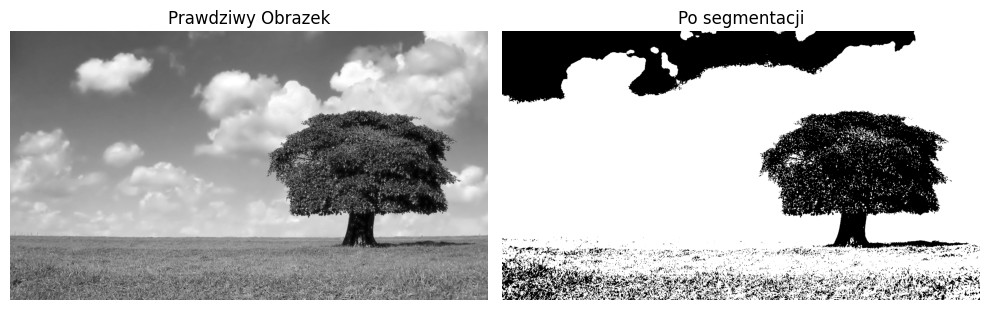

In [ ]:
img = Image.open('images/simple_tree.png').convert('L')
img = np.array(img) / 255.0

T = 127 / 255.0
segmented_image = img >= T

# Wizualizacja
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Prawdziwy Obrazek")
ax[0].axis("off")

ax[1].imshow(segmented_image, cmap='gray')
ax[1].set_title("Po segmentacji")
ax[1].axis("off")

plt.tight_layout()
plt.show()

---

2. **Klasteryzacja (<a href="https://vincmazet.github.io/bip/segmentation/clustering.html">Clustering</a>):**

   Technika grupowania pikseli na podstawie ich cech, takich jak kolor czy intensywność.
   
   Przykładowym alagorytmem jest K-means, który iteracyjnie przydziela piksele do $K$ klastrów, minimalizując różnice w obrębie klas.

   Zarys algorytmu:

   1. Wybierz \( K \) początkowych centrów klastrów, losowo.

   2. Przypisz każdy piksel do klastra, którego środek jest najbliższy, minimalizując odległość między pikselem a środkiem klastra.

   3. Przelicz środki klastrów, uśredniając wartości wszystkich pikseli przypisanych do danego klastra.

   4. Powtarzaj kroki 2 i 3, aż do osiągnięcia zbieżności, tj. sytuacji, w której żaden piksel nie zmienia przypisanego klastra.

   <div style="text-align: center;">
        <table style="width: 100%; table-layout: fixed;">
            <tr>
                <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/basic_clustering.png?raw=1" alt="Image 1" style="width: 40%"/></td>
            </tr>
        </table>
        <p style="text-align: center; font-style: italic">Klasteryzacja obrazu za pomocą K-means (<a href="https://en.wikipedia.org/wiki/K-means_clustering">źródło</a>)</p>
    </div>

    <div style="text-align: center;">
        <table style="width: 100%; table-layout: fixed;">
            <tr>
                <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/clustering_pre.png?raw=1" alt="Image 1" style="width: 90%"/></td>
                <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/clustering_after.png?raw=1" alt="Image 2" style="width: 90%"/></td>
            </tr>
        </table>
        <p style="text-align: center; font-style: italic">Wykorzystanie algorytmu K-means (<a href="https://en.wikipedia.org/wiki/Image_segmentation">źródło</a>)</p>
    </div>

---

3. **Metody histogramowe:**

   Analiza histogramu obrazu w celu identyfikacji szczytów i dolin jako potencjalnych klastrów.

   <div style="text-align: center;">
        <table style="width: 100%; table-layout: fixed;">
            <tr>
                <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/histogram_method.png?raw=1" alt="Image 1" style="width: 70%"/></td>
            </tr>
        </table>
        <p style="text-align: center; font-style: italic">Wykorzystanie histogramu do segmentacji</p>
    </div>   

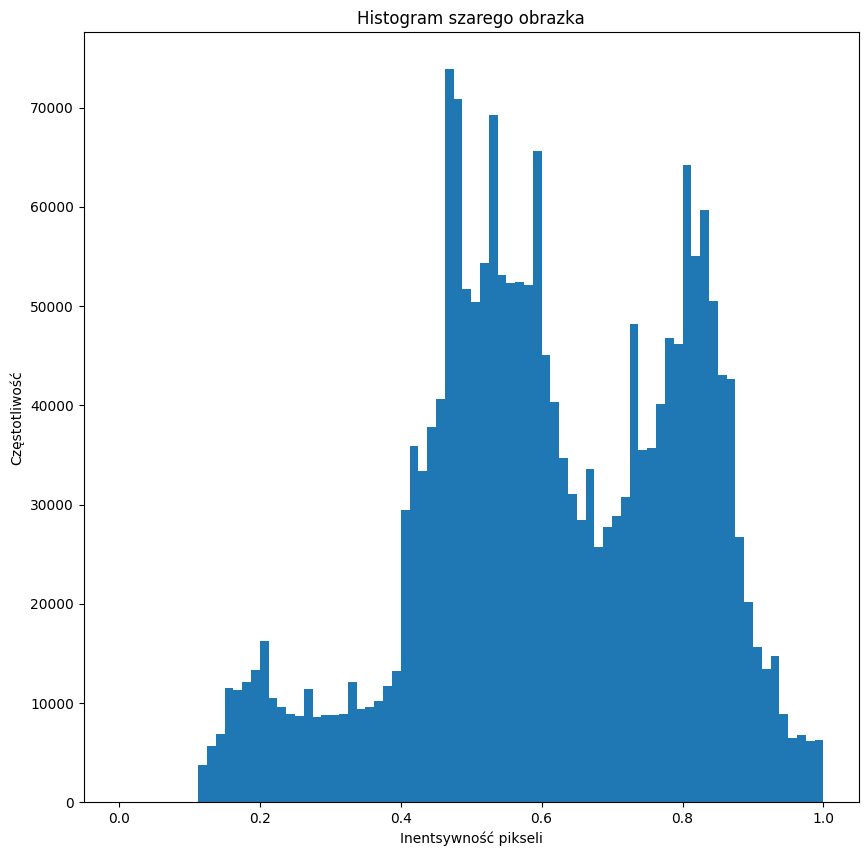

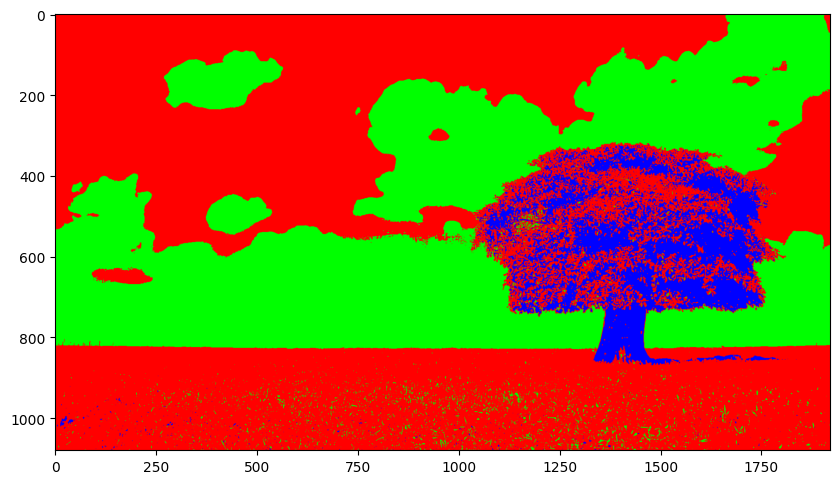

In [ ]:
img = Image.open('images/simple_tree.png').convert('L')
img = np.array(img) / 255.0

plt.figure(figsize=(10, 10))
plt.hist(img.flat, bins=80, range=(0, 1))
plt.title("Histogram szarego obrazka")
plt.xlabel("Inentsywność pikseli")
plt.ylabel("Częstotliwość")
plt.show()

region_3 = (img <= 0.3)
region_1 = (img > 0.3) & (img <= 0.7)
region_2 = (img > 0.7)

segmented_img = np.zeros((img.shape[0], img.shape[1], 3))

segmented_img[region_1] = (1, 0, 0)
segmented_img[region_2] = (0, 1, 0)
segmented_img[region_3] = (0, 0, 1)

plt.figure(figsize=(10, 12))
plt.imshow(segmented_img)

Więcej na temat klasycznych algorytmów segmentacji obrazów polecam: https://medium.com/@VK_Venkatkumar/segmentation-traditional-deep-learning-approaches-edd50a3308b3

---

### __Zadanie 1 (Obowiązkowe)__

Napisz własny algorytm automatycznego wyznaczania podziału obrazu ze względu na $k$ klas.

Możesz posłużyć się metodą histogramu przedstawioną powyżej i stworzyć własny algorytm podziału lub skorzystać z metody Otsu i ogólnić ją do &k& klas (https://en.wikipedia.org/wiki/Otsu%27s_method).

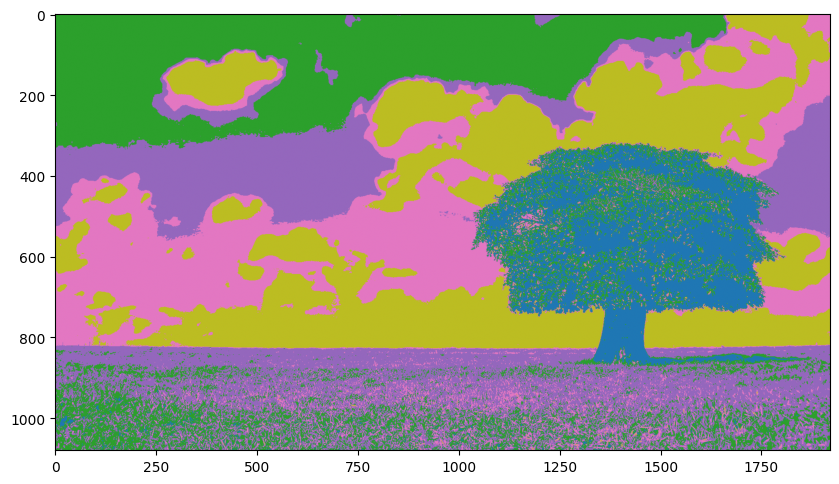

In [ ]:
# Twoja implementacja (funkcja, która przyjmuje obraz)

from itertools import combinations

def cluster_image(img, k=3):
    hist, bin_edges = np.histogram(img, bins=80, range=(0, 1), density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    max_var = 0
    thresh = None

    for comb in combinations(range(1, len(hist)), k-1):
        comb = [0] + sorted(comb) + [len(hist)]
        var = 0

        for j in range(k):

            w_j = np.sum(hist[comb[j]:comb[j+1]])
            if w_j == 0:
                continue

            mu_j = np.sum(bin_centers[comb[j]:comb[j+1]] * hist[comb[j]:comb[j+1]]) / w_j
            var += w_j * (mu_j - np.sum(bin_centers * hist)) ** 2

        if var > max_var:
            max_var = var
            thresh = [bin_centers[t] for t in comb[1:-1]]

    segmented_img = np.zeros_like(img)
    thresholds = [0] + thresh + [1]

    colormap = plt.colormaps["tab10"]

    for i in range(k):
        mask = (img > thresholds[i]) & (img <= thresholds[i + 1])
        segmented_img[mask] = i / k

    plt.figure(figsize=(10, 12))
    plt.imshow(colormap(segmented_img)[:, :, :3])

cluster_image(img, 5)

---

### 2. Techniki oparte na sztucznej inteligencji

Metody te wykorzystują uczenie maszynowe, a w szczególności głębokie sieci neuronowe, aby automatycznie uczyć się cech i wzorców w danych. Dzięki swojej elastyczności i wysokiej dokładności są obecnie standardem w złożonych zadaniach segmentacji.


### **1. Fully Convolutional Networks (<a href="https://arxiv.org/pdf/1411.4038">FCNs</a>)**
FCN to podstawa wielu modeli segmentacji obrazów opartych na głębokim uczeniu. Sieci te składają się z warstw filtrów konwolucyjnych, które automatycznie uczą się hierarchicznych reprezentacji cech obrazu wejściowego. Takie podejście pozwala na precyzyjną segmentację nawet złożonych scen.

Ich architektura przypomina CNN, z tą różnicą, że wszystkie warstwy fully connected są zamienione na warstwy konwolucyjne.

Jednym z najpopularniejszuch architektur wykorzystujących CNN jest <a href="https://arxiv.org/pdf/1505.04597">U-Net</a>, która jest idealnym przykładem semantycznej segmentacji na k klas.

U-Net przyjmuje na wejściu obraz wielkości $256 \times 256$ i dzieli na $k$ różnych klas

<div style="text-align: center;">
    <table style="width: 100%; table-layout: fixed;">
        <tr>
            <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/U-net.png?raw=1" alt="Image 1" style="width: 80%"/></td>
        </tr>
    </table>
    <p style="text-align: center; font-style: italic">Architektura U-net (<a href="https://www.matthewtancik.com/nerf">źródło</a>)</p>
</div>

### **Zadanie 2 (Bonusowe)**

Napisz prostą sieść konwolucyjną (CNN), która będzie poprawnie dokonywać segmentacji obrazka.

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import OxfordIIITPet
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision.transforms import functional as F

# Ścieżka do przechowywania danych
data_dir = "./data"

transform = transforms.Compose([transforms.Resize((128, 128)),transforms.ToTensor()])

def preprocess_mask(mask):
    mask_tensor = F.to_tensor(mask)
    binary_mask = (mask_tensor > 0.01).float()
    return binary_mask

dataset = OxfordIIITPet(
    root=data_dir, split="trainval", target_types="segmentation", download=True,
    transform=transform,
    target_transform=transforms.Compose([transforms.Resize((128, 128)), preprocess_mask])
)

dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Zobaczmy dane!
images, masks = next(iter(dataloader))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(images[0].permute(1, 2, 0))
plt.title("Oryginalny obraz")

plt.subplot(1, 2, 2)
plt.imshow(masks[0][0], cmap='gray')
plt.title("Maska segmentacji")
plt.show()


In [ ]:
import torch.nn as nn

# Definicja modelu
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        ...

    def forward(self, x):
        ...


In [ ]:
model = ...
criterion = ...
optimizer = ...

epochs = 5
for epoch in range(epochs):
    for images, masks in dataloader:
        ...


In [ ]:
images, masks = next(iter(dataloader))
outputs = model(images)
predictions = ... # (outputs > 0.5).float()

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(images[0].permute(1, 2, 0))
plt.title("Oryginalny obraz")

plt.subplot(1, 3, 2)
plt.imshow(masks[0][0], cmap="gray")
plt.title("Maska prawdziwa")

plt.subplot(1, 3, 3)
plt.imshow(predictions[0][0].detach().numpy(), cmap="gray", vmin=0, vmax=1)
plt.title("Maska przewidziana")
plt.show()

#### **2. Enkoder-Decoder**
Inną popularną architekturą przy segmentacji obrazków jest model klasyczny encoder-decoder.
- Enkoder - Wydobywa mapy cech za pomocą warstw konwolucyjnych.
- Dekoder - Przeprowadza upsampling, generując pikselowe predykcje klas.

Więcej o enkoderach i dekodearch warto poczytać tutaj: https://medium.com/@ahmadsabry678/a-perfect-guide-to-understand-encoder-decoders-in-depth-with-visuals-30805c23659b

<div style="text-align: center;">
    <table style="width: 100%; table-layout: fixed;">
        <tr>
            <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/Seg-Net.png?raw=1" alt="Image 1" style="width: 80%"/></td>
        </tr>
    </table>
    <p style="text-align: center; font-style: italic">Architektura Seg-Net (<a href="https://arxiv.org/pdf/1511.00561">źródło</a>)</p>
</div>


### **3. Transformery**

Transformery, początkowo opracowane do przetwarzania języka naturalnego, znalazły zastosowanie w segmentacji obrazów.

Idealnym przykładem jest Vision Transformer (ViT), który jest nowoczesnym modelem segmentacji obrazów, który wykorzystuje architekturę transformera. Obraz wejściowy jest dzielony na małe fragmenty (tzw. patches), które są następnie przetwarzane jako sekwencje danych. Dzięki mechanizmowi samouwagi (<a href="https://arxiv.org/pdf/1706.03762">self-attention</a>), dzięki czemu ViT potrafi uchwycić globalny kontekst obrazu, co pozwala na precyzyjną segmentację, szczególnie w zadaniach wymagających rozumienia całej sceny.

Więcej o architekturze tutuaj: https://viso.ai/deep-learning/vision-transformer-vit/

<div style="text-align: center;">
    <table style="width: 100%; table-layout: fixed;">
        <tr>
            <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/VIT.png?raw=1" alt="Image 1" style="width: 60%"/></td>
        </tr>
    </table>
    <p style="text-align: center; font-style: italic">Architektura Vision Transformer (<a href="https://github.com/google-research/vision_transformer">źródło</a>)</p>
</div>

## 2. Segment Anything

Segment Anything to model stworzony przez Meta AI w 2023 do segmentacji zdjęć.


<div style="text-align: center;">
    <figure>
    <img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/train.jpg?raw=1" alt="drawing" width="40%"/>
    <figcaption>
    Fig. Wynik segmentacji Segment Anything (<a href="https://github.com/facebookresearch/segment-anything?tab=readme-ov-file#segment-anything">źródło</a>)
    </figcaption>
    </figure>
</div>




### Opis Modelu

#### Prompt


Prompt określa w jaki sposób model ma dokonać segmentacji.

Możliwymi promptami są:
- Tekst
- Punkty
- Ramka
- Maski

<div style="text-align: center;">
    <figure>
    <img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/model_diagram.PNG?raw=1" alt="drawing" width="100%"/>
    <figcaption>
    Fig. Schemat modelu (<a href="https://arxiv.org/pdf/2304.02643">źródło</a>)
    </figcaption>
    </figure>
</div>

Segment Anything model składa się z 3 komponentów:
- Image Encoder
- Prompt Encoder
- Mask Decoder




### Image Encoder

Enkoderem w Segment Anything teoretycznie może być jakikolwiek sieć zwracająca embedding rozmiaru:
$$C\times H\times W$$
SAM korzysta z enkodera __ViT__ nauczonego jako __MAE ( Masked Auto Encoder )__

MAE to model który uczy się reprezentacji danych przez maskowanie części wejść i rekonstrukcję całego obrazu.

Tokeny w transformerze są częścią obrazu $16\times 16$ pikseli.

Enkoder jest funkcją:

$$ 1024 \times 1024 \times 3 \rightarrow 64 \times 64 \times 256 $$



### Prompt Encoder

Każdy rodzaj promptu jest enkodowany w inny sposób. Wyróżnione są 2 rodzaje promptów:

- __Gęste__ (dense) - maski

- __Rzadkie__ (sparse) - tekst, punkty, ramka


<div style="text-align: center;">
    <figure>
    <img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/prompt.PNG?raw=1" alt="drawing" width="50%"/>
    <figcaption>
    Fig. Schemat dekodera (<a href="https://arxiv.org/pdf/2304.02643">źródło</a>)
    </figcaption>
    </figure>
</div>


Prompty rzadkie są mapowane w $256$-wymiarowe reprezentacje:

- __Tekst__ - enkodowany jest enkoder z __CLIP__. (Model OpenAI, do rozpoznowania zawartości obrazu (<a href="https://openai.com/index/clip">więcej</a>)

- __Punkty__ - reprezantcja punktu i reprezentacja czy punkt jest na pierwszym planie czy tle

- __Ramka__ - lewy górny róg i nauczona reprezentacja konceptu *"lewy górny róg"*, to samo dla prawego dolnego rogu

Prompty gęste (__maski__):

Maski wejściowe są pomniejszane: $\times \frac{1}{4}$ downsampling rozdzielczości i $\times \frac{1}{4}$ przez warstwy konwolucyjne.

Taka reprezentacja jest dodawana do reprezentacji obrazu, co umożliwia modelowi uwzględnienie dodatkowej informacji z maski w procesie segmentacji.


### Mask Decoder

Ten moduł mapuje nasze embeding-i na maski segmentacji.

<div style="text-align: center;">
    <figure>
    <img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/decoder.PNG?raw=1" alt="drawing" width="100%"/>
    <figcaption>
    Fig. Schemat dekodera (<a href="https://arxiv.org/pdf/2304.02643">źródło</a>)
    </figcaption>
    </figure>
</div>

Na wejściu dekoder przyjmuje embeddingi z enkodera obrazu i promptu.



Architektura dekodera jest podobna do transformera.

__Tokeny__ w przypadku SAM to repreznetacje prompta i nauczone tokeny 'wyjściowe'

Każda warstwa dekodera wykonuje 4 kroki:
- self-attention na tokenach,
- cross-attention z tokenów na reprezentacje obrazu,
- MLP na tokenach,
- cross-attention z reprezentacji obrazu na tokeny

Dekoder zwraca trzy maski, i wraz z nimi wytrenowaną metrykę (uczoną na IoU)

### IoU (Intersection over Union)

<a href="https://en.wikipedia.org/wiki/Jaccard_index">__IoU__</a> to stosunek przecięcia do sumy dwóch obszarów, w tym przypadku obszaru pokrycia predykcji maski i rzeczywistej maski:

$$IOU = \frac{Area_{pred} \cap Area_{true}}{Area_{pred} \cup Area_{true}}$$


IoU przyjmuje wartość z zakresu od 0 do 1:

- IoU = 1 oznacza, że prognozowana maska dokładnie pokrywa rzeczywistą maskę.

- IoU = 0 oznacza, że prognozowana maska nie pokrywa się wcale z rzeczywistą maską.


### Zastosowanie Praktyczne

Demo modelu dostępne na: <a href="https://segment-anything.com/demo#">Demo</a>

Uruchomienie modelu w Colab:

In [1]:
%pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-myk82ktj
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-myk82ktj
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=c056630ca854cd73c407294f9bdf769f08a23a0b401d0249d3f5ed3c856d3f14
  Stored in directory: /tmp/pip-ephem-wheel-cache-az3k53hg/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment_anything


Pobierz checkpoint modelu (dostępne <a href="https://github.com/facebookresearch/segment-anything?tab=readme-ov-file#model-checkpoints">tutaj</a>)

Sugerujemy pobrać najmnieszy:

In [2]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

--2024-12-10 20:34:39--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.111, 13.226.210.25, 13.226.210.15, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: ‘sam_vit_b_01ec64.pth’

sam_vit_b_01ec64.pt 100%[===================>] 357.67M   139MB/s    in 2.6s    

2024-12-10 20:34:42 (139 MB/s) - ‘sam_vit_b_01ec64.pth’ saved [375042383/375042383]



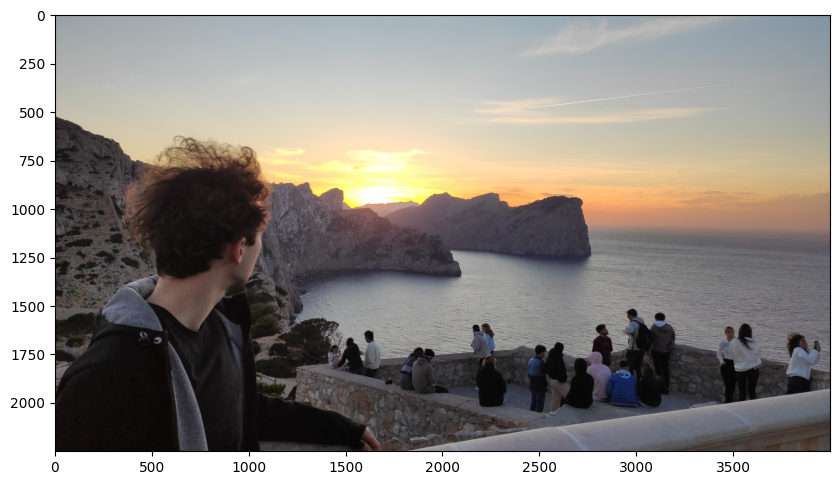

In [1]:
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator
import matplotlib.pyplot as plt
import cv2
import numpy as np

def show_masks(masks):
    if len(masks) == 0:
        return
    sorted_masks = sorted(masks, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_masks[0]['segmentation'].shape[0], sorted_masks[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_masks:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    plt.figure(figsize=(20,20))
    ax.imshow(img)

def show_mask(mask):
    color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax = plt.gca()
    ax.imshow(mask_image)


image = cv2.imread('photo.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(image)

Określenie promptu:

In [3]:
point_prompt = np.array([[750, 1000]])
input_label = np.array([1])

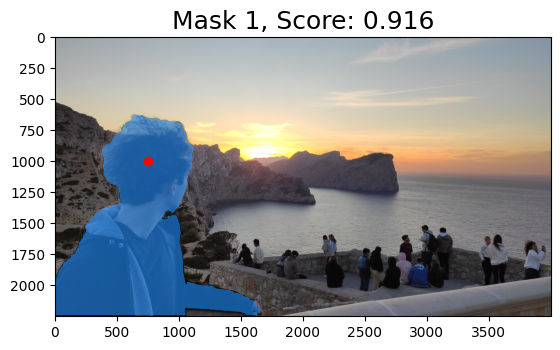

In [4]:
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b_01ec64.pth")
predictor = SamPredictor(sam)
predictor.set_image(image)
masks, scores, logits = predictor.predict(
    point_coords=point_prompt,
    point_labels=input_label
)


for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.imshow(image)
    show_mask(mask)
    plt.scatter(point_prompt[0][0], point_prompt[0][1], c='red')
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.show()

## __Zadanie 3 (Nieobowiązkowe)__

Uruchom segmentację zdjęcia używając maski jako promptu.

In [4]:
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b_01ec64.pth")
predictor = SamPredictor(sam)
predictor.set_image(image)
masks, scores, logits = predictor.predict(
    ...
)

/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


KeyboardInterrupt: 

Używając SamAutomaticMaskGenerator:

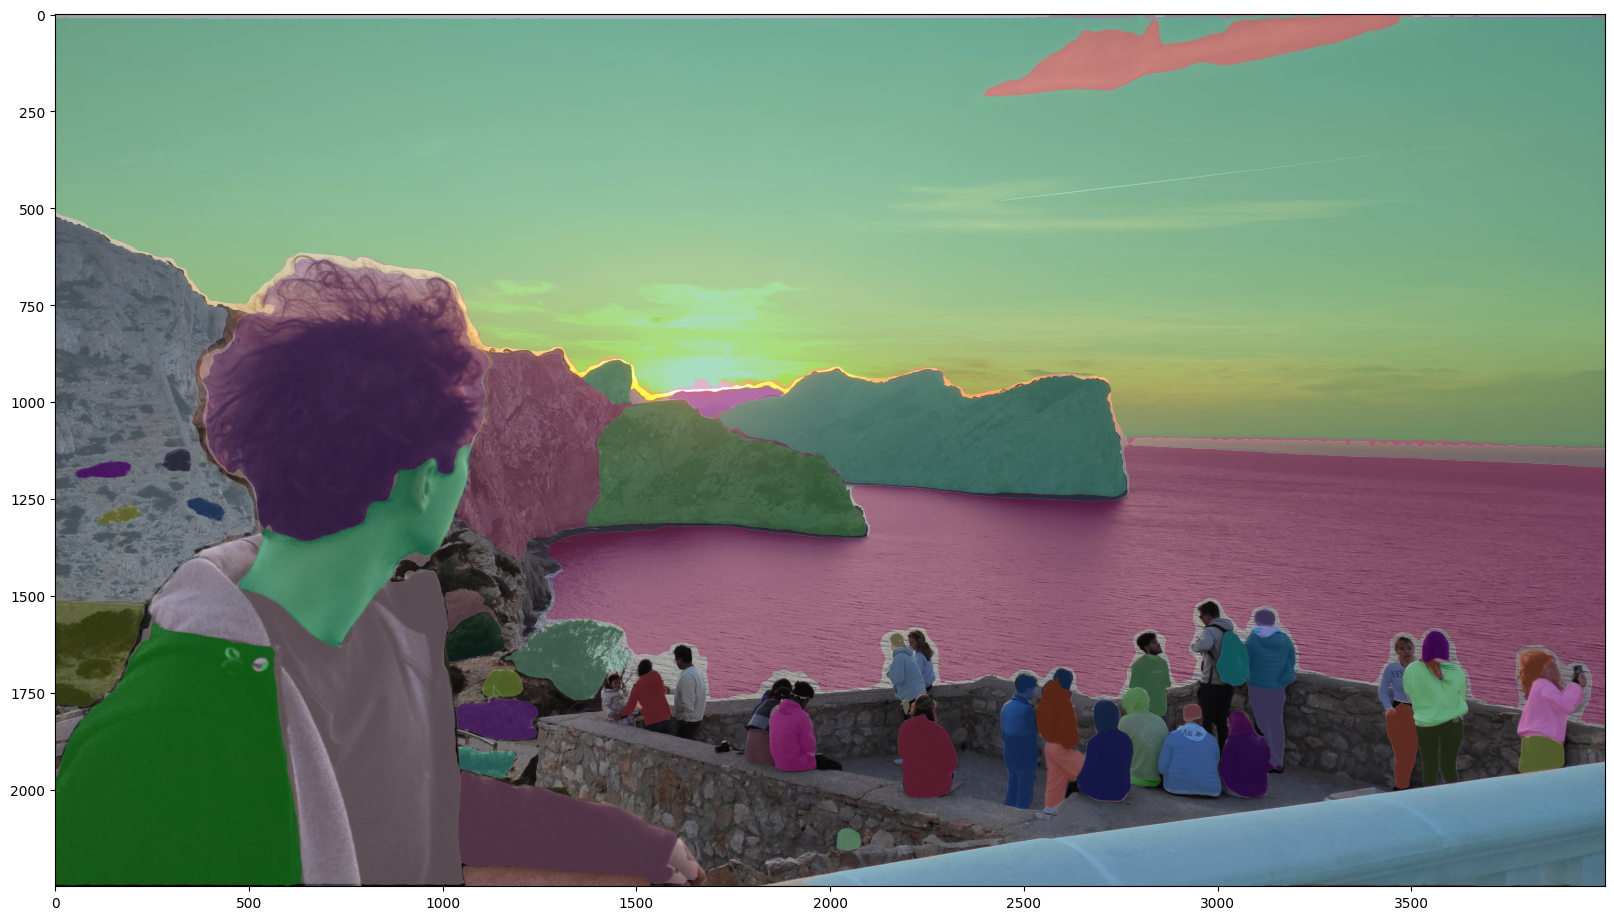

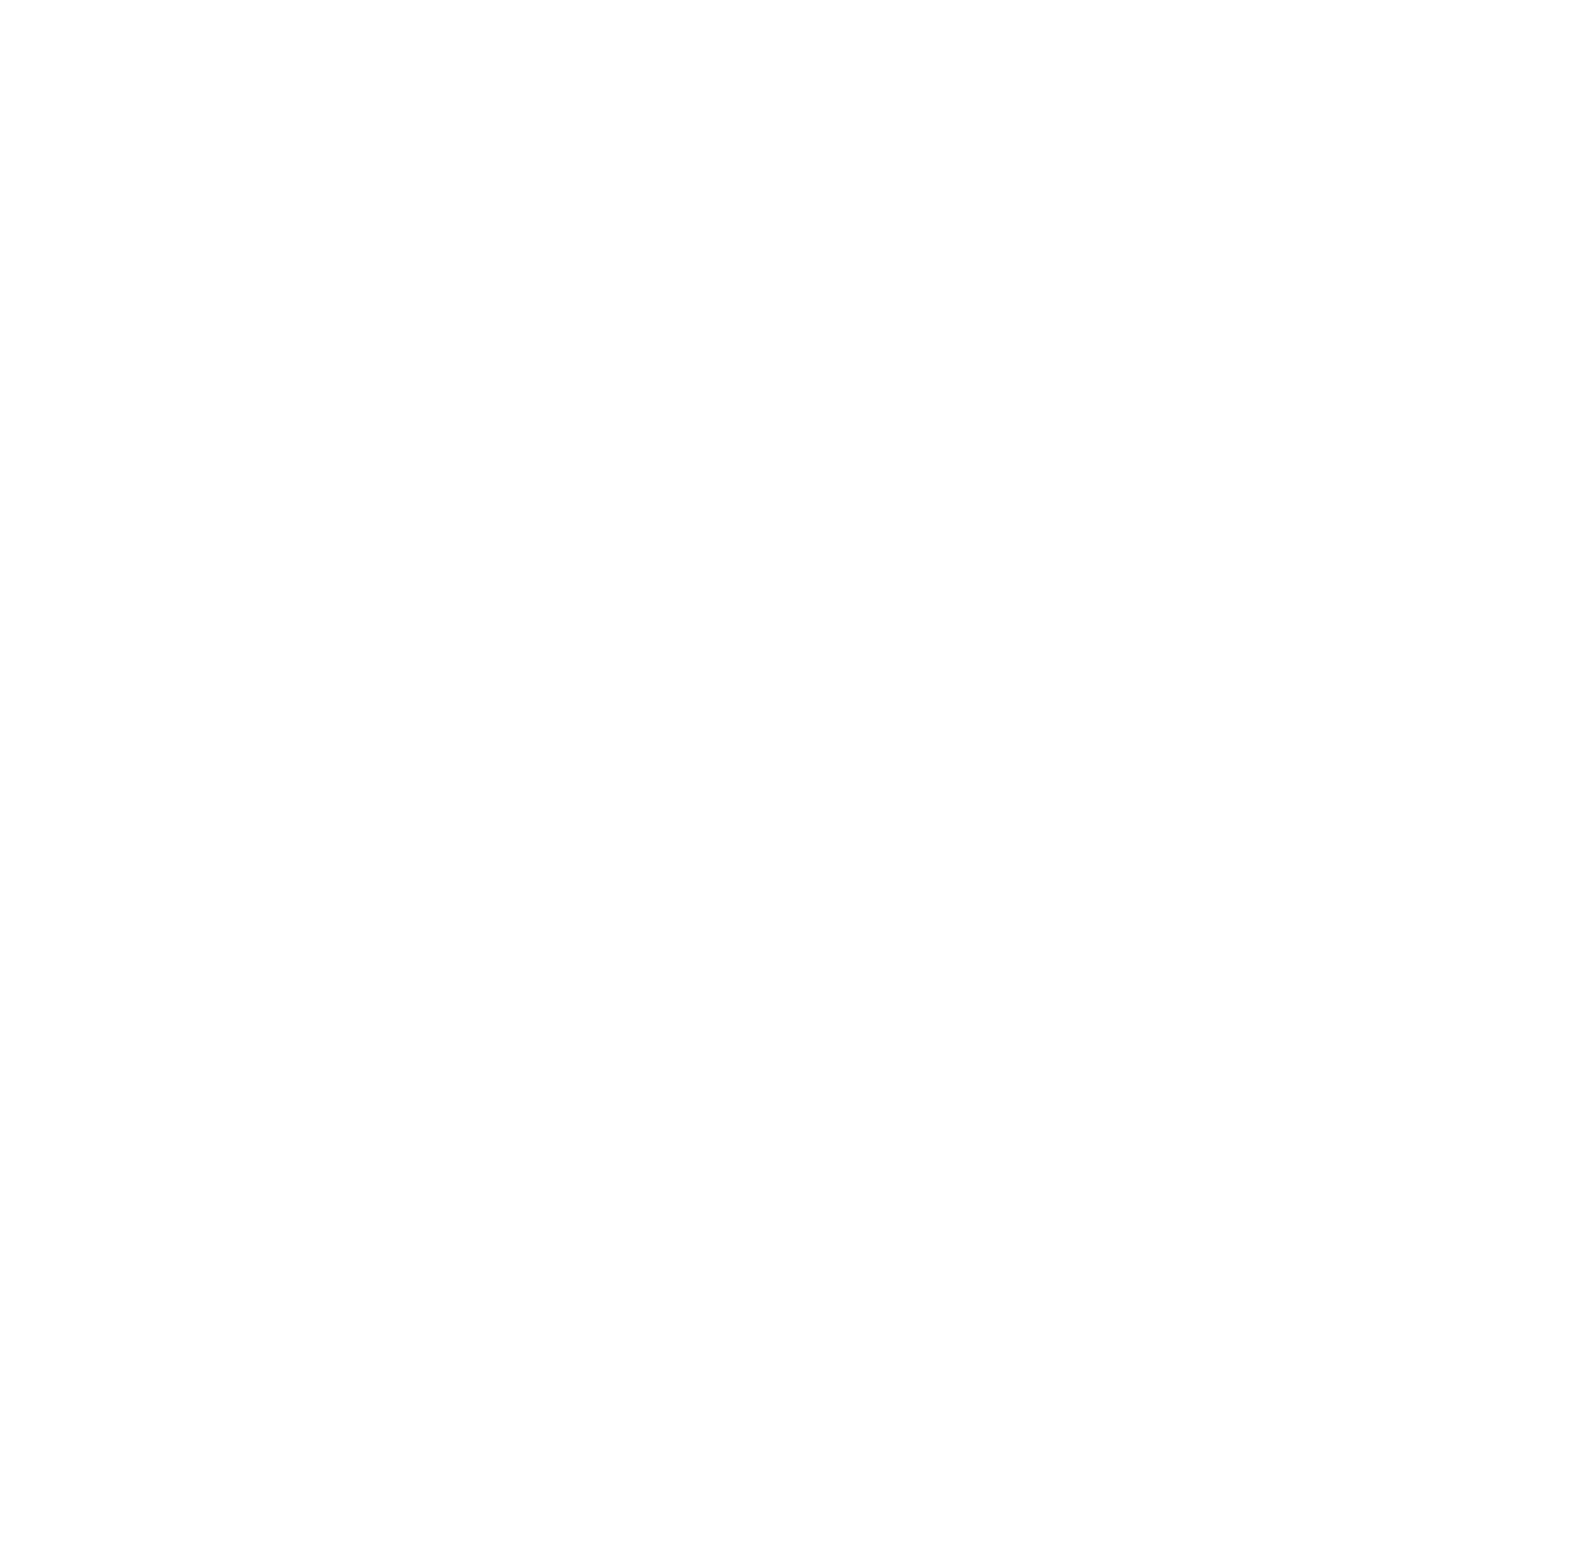

In [5]:
sam.to(device="cuda")
mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.88,
    box_nms_thresh=0.7,
    stability_score_thresh=0.95,
    crop_n_layers=0,
    crop_n_points_downscale_factor=1,
    min_mask_region_area=100,
)
masks = mask_generator.generate(image)

plt.figure(figsize=(20,20))
plt.imshow(image)
show_masks(masks)
plt.axis('off')
plt.show()

## __Zadanie 4 (Obowiązkowe)__

Dostosuj parametry generatora mask, tak żeby wydobyć segment z aparatem fotograficznym leżącą na murku. W razie potrzeby skorzystaj z ([dokumentacji klasy](https://github.com/facebookresearch/segment-anything/blob/dca509fe793f601edb92606367a655c15ac00fdf/segment_anything/automatic_mask_generator.py#L35)).

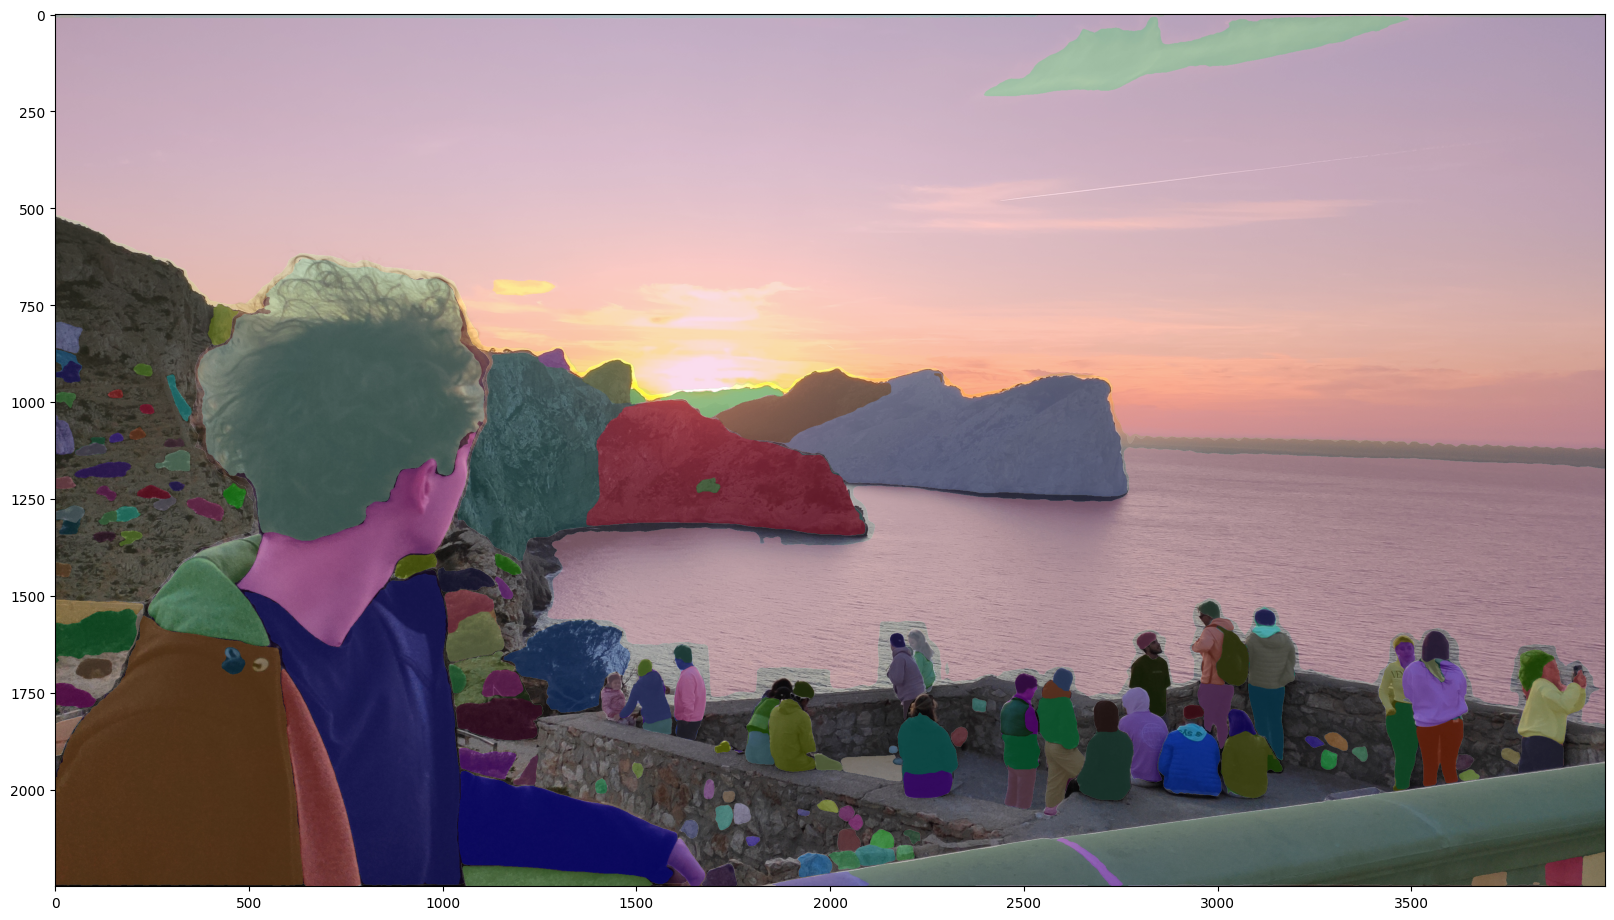

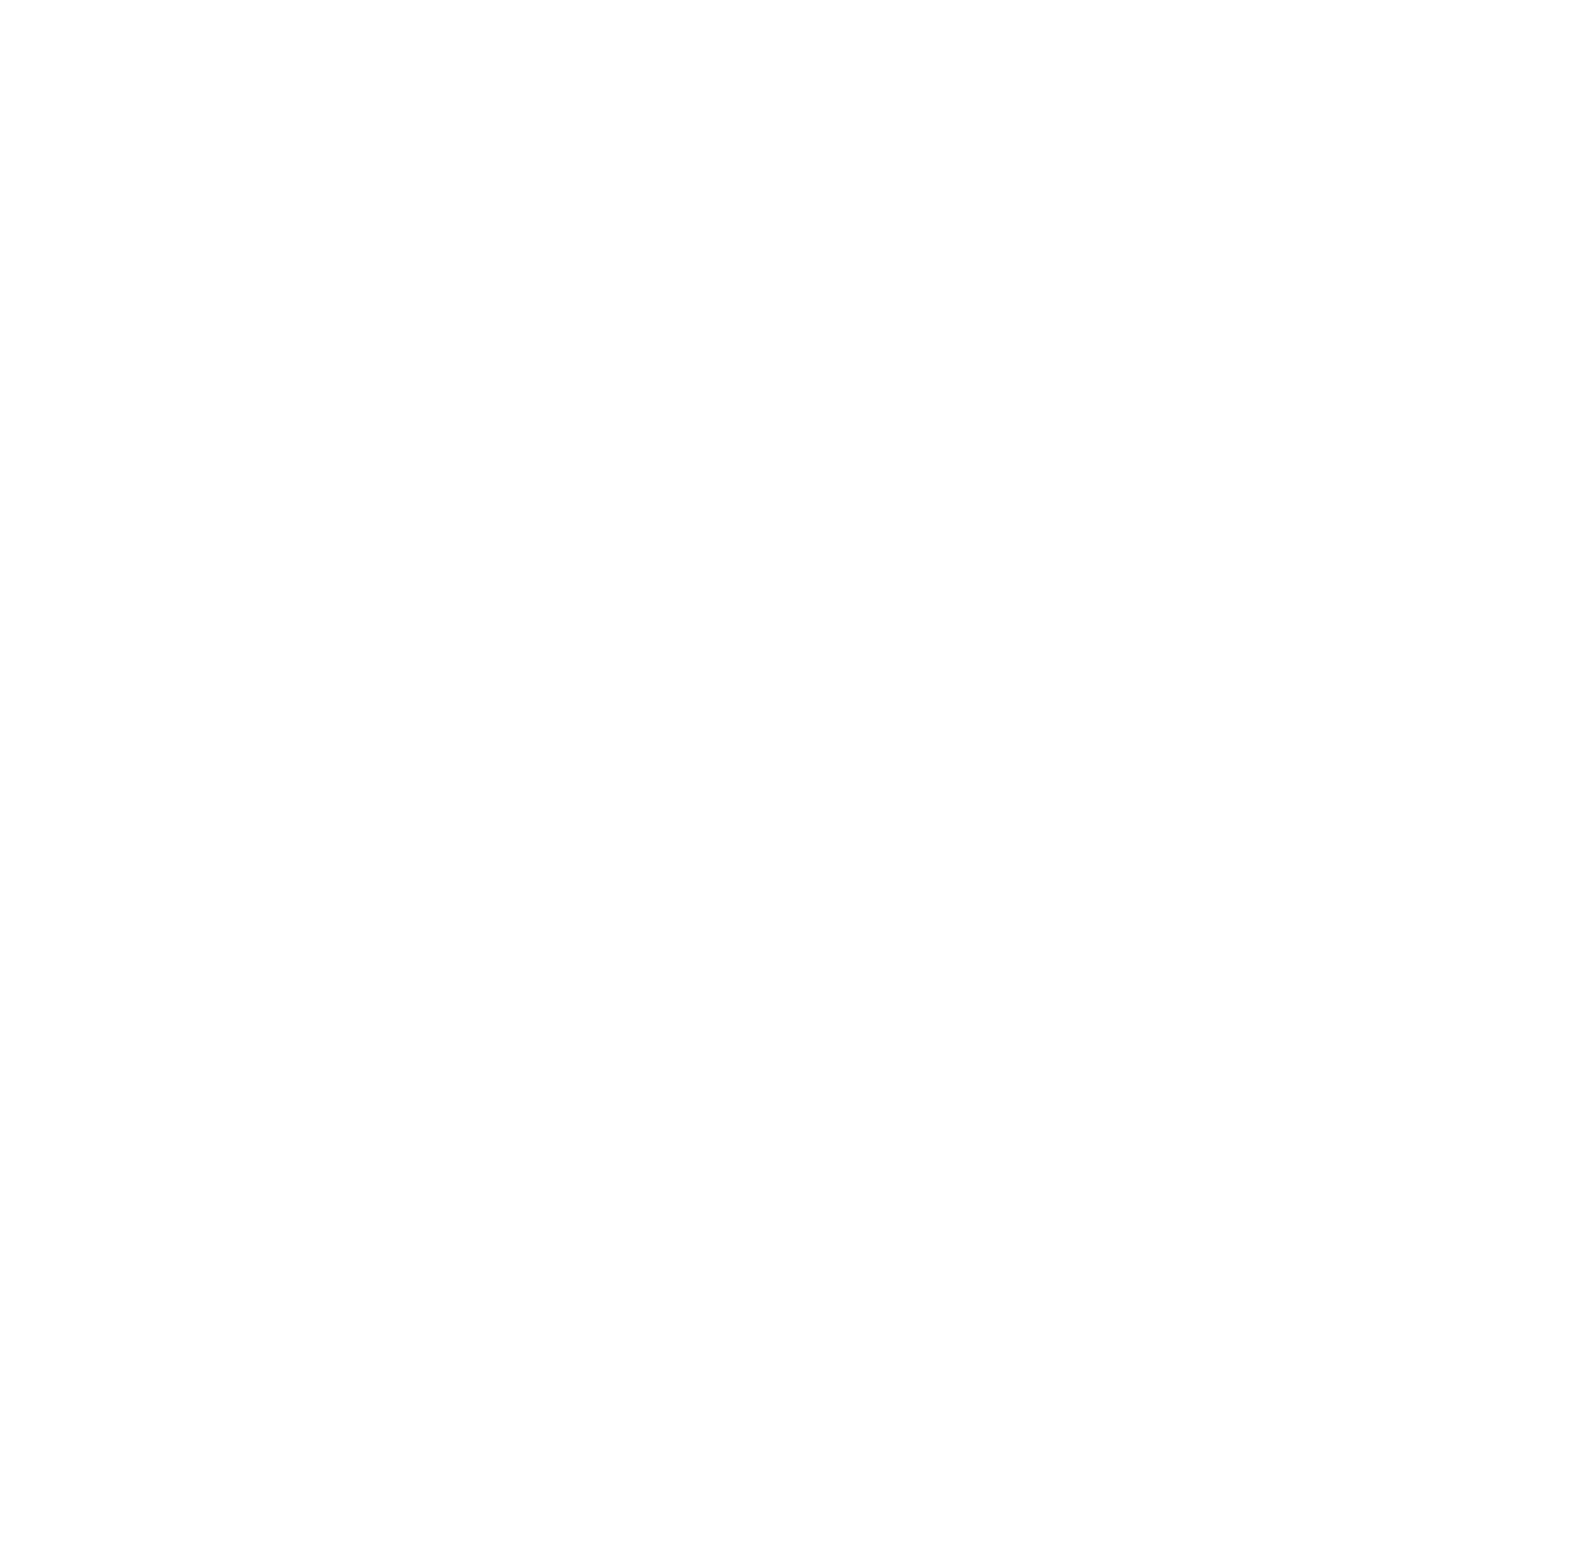

In [6]:
# Miejsce na rozwiązanie

mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=50,
    pred_iou_thresh=0.88,
    box_nms_thresh=0.7,
    stability_score_thresh=0.95,
    crop_n_layers=1,
    crop_n_points_downscale_factor=1,
    min_mask_region_area=100,
)

masks = mask_generator.generate(image)

plt.figure(figsize=(20,20))
plt.imshow(image)
show_masks(masks)
plt.axis('off')
plt.show()


Sekcja stworzona na podstawie:
- <a href="https://segment-anything.com/">Projekt</a>,
- <a href="https://github.com/facebookresearch/segment-anything?tab=readme-ov-file">Repozytorium</a>,
- <a href="https://ai.meta.com/research/publications/segment-anything/">Artykuł</a>.

Gdzie można znaleźć więcej informacji na temat __SAM__.

## 3. Segmentacja video

Segmentacja wideo to proces przypisywania każdemu pikselowi w każdej klatce filmu określonej klasy lub instancji, podobnie jak w segmentacji obrazów, ale z uwzględnieniem zależności czasowych między klatkami.

### Przykłady wykorzystania:

1. Rozpoznawanie i śledzenie pojazdów oraz pieszych w autonomicznych samochodach.
2. Segmentacja organów w nagraniach medycznych, np. z endoskopów.
3. Monitorowanie i wykrywanie podejrzanych zachowań w systemach bezpieczeństwa.

<div style="text-align: center;">
    <table style="width: 100%; table-layout: fixed;">
        <tr>
            <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/video_example_1.png?raw=1" alt="Image 1" style="width: 90%"/></td>
            <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/video_example_2.png?raw=1" alt="Image 1" style="width: 90%"/></td>
        </tr>
    </table>
    <p style="text-align: center; font-style: italic">Przykłady użycia segmentacji video (<a href="https://ojs.aaai.org/index.php/AAAI/article/view/16308">źródło</a>)</p>
</div>

### Trudności z jakimi się zmagamy w segmentacji wideo

1. Obiekty zmieniają swoje położenie, kształt i orientację w czasie. Modele muszą uchwycić te zmiany, co wymaga analizy wielu klatek jednocześnie.
2. Wideo często zawiera zmieniające się tło, np. ruch liści na wietrze lub zmieniające się oświetlenie.
3. Obiekty mogą być chwilowo zasłonięte przez inne obiekty, co utrudnia ich śledzenie.

### Rodzaje segmentacji video

<div style="text-align: center;">
    <table style="width: 100%; table-layout: fixed;">
        <tr>
            <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/video_seg_categories.png?raw=1" alt="Image 1" style="width: 50%"/></td>
        </tr>
    </table>
    <p style="text-align: center; font-style: italic">Przykłady użycia segmentacji video (<a href="https://www.v7labs.com/blog/video-segmentation-guide">źródło</a>)</p>
</div>

1. Video Object Segmentation (<a href="https://paperswithcode.com/task/video-object-segmentation#papers-list">VOS</a>)

    Zadaniem VOS jest segmentacja i śledzenie określonych obiektów w materiale wideo. Proces ten rozpoczyna się od inicjalizacji obiektu w pierwszej klatce filmu, a następnie polega na śledzeniu jego ruchu w kolejnych klatkach. Celem jest wyodrębnienie obiektu z tła i monitorowanie zmian w jego położeniu oraz kształcie.

    Przykładem unsupervised VOS jest Focus on Foreground Network (<a href="https://arxiv.org/pdf/2012.02534">F2Net</a>), który kładzie nacisk na identyfikację i segmentację obiektów pierwszoplanowych. F2Net wprowadza mechanizm **Center Prediction Branch** do przewidywania środka obiektu. Informacja ta jest przekształcana w mapę gaussowską, co wspiera model w precyzyjnym dopasowywaniu cech między klatkami.

    <div style="text-align: center;">
        <table style="width: 100%; table-layout: fixed;">
            <tr>
                <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/F2Net.png?raw=1" alt="Image 1" style="width: 70%"/></td>
            </tr>
        </table>
        <p style="text-align: center; font-style: italic">Architektura F2Net (<a href="https://arxiv.org/pdf/2012.02534">źródło</a>)</p>
    </div>

2. Video Semantic Segmentation (<a href="https://paperswithcode.com/task/video-semantic-segmentation#papers-list">VSS</a>)

    Zadaniem Video Semantic Segmentation (VSS) jest segmentacja i analiza semantyczna treści wideo. Obejmuje nie tylko wyodrębnianie obiektów w wideo, ale także rozpoznawanie ich znaczenia i kontekstu w scenie. Celem jest pełne zrozumienie zawartości nagrania, takich jak identyfikacja ludzi chodzących po chodniku, samochodów jadących po drodze czy budynków jako wieżowców.

    Przykładem Instance-Agnostic VSS jest TDNet (<a href="https://arxiv.org/pdf/2004.01800">paper</a>), która jest segmentacją semantyczną wideo, który opiera się na grupowych konwolucjach, aby równolegle przetwarzać cechy wideo i poprawiać ich reprezentację. Architektura dzieli cechy wyekstrahowane z głębokiej sieci na $N$
    grup, a każda z nich jest przetwarzana przez osobną, płytką pod-sieć o uproszczonej strukturze. Dzięki temu podejściu każda pod-sieć specjalizuje się w modelowaniu oddzielnych podprzestrzeni cech, co po połączeniu wyników pozwala na uzyskanie silniejszej końcowej reprezentacji.

    <div style="text-align: center;">
        <table style="width: 100%; table-layout: fixed;">
            <tr>
                <td style="text-align: center;"><img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/TDNet.png?raw=1" alt="Image 1" style="width: 70%"/></td>
            </tr>
        </table>
        <p style="text-align: center; font-style: italic">Architektura TDNet (<a href="https://arxiv.org/pdf/2004.01800">źródło</a>)</p>
    </div>

#### Porównanie metod

| **Cecha**                | **Video Object Segmentation (VOS)**        | **Video Semantic Segmentation (VSS)**      |
|---------------------------|--------------------------------------------|---------------------------------------------|
| **Cel**                  | Segmentacja i śledzenie indywidualnych obiektów | Klasyfikacja pikseli do klas semantycznych  |
| **Zależności czasowe**    | Silnie uwzględniane (np. mask propagation)  | Często ignorowane lub uproszczone           |
| **Rozróżnianie instancji**| Tak                                        | Nie                                          |
| **Zastosowania**          | Śledzenie obiektów, monitorowanie          | Rozpoznawanie otoczenia, klasyfikacja scen |
| **Przykład**              | Śledzenie psa na tle ruchomej sceny         | Klasyfikacja pikseli jako "pies", "drzewo"  |


### SAM 2

W lipcu 2024 roku Meta AI zaprezentowało nową wersję modelu Segment Anything - SAM 2.

<div style="text-align: center;">
  <video width="70%" controls>
    <source src="videos\sam2.mp4" type="video/mp4">
  </video>
</div>

SAM 2 to generalizacja modelu SAM, która pozwala na segmentację obiektów w sekwencjach wideo.

Żeby model pamiętał informacje o obiektach w kolejnych klatkach, wykorzystuje on mechanizm __memory__.

Segmenty z poszczeólnych klatek są przekazywane do pamięci, która jest potem wykorzystywana do segmentacji kolejnych klatek.

<a href="https://ai.meta.com/sam2/">Więcej na temat __SAM 2__ </a>

## 4. Datasety do segmentacji

### Cityscapes

__Cityscapes__ to zbiór danych zawierający zdjęcia z 50 miast w Niemczech, Szwajcarii i Austrii.

<div style="text-align: center;">
    <figure>
    <img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/cityscapes.jpg?raw=1" alt="drawing" width="50%"/>
    <figcaption>
    Fig. Przykład (Fine) z datasetu Cityscapes, miasto Münster (<a href="https://www.cityscapes-dataset.com/examples/#fine-annotations">źródło</a>)
    </figcaption>
    </figure>
</div>

Dane są podzielone na 2 kategorie:

- __Fine annotations__

- __Coarse annotations__

<div style="text-align: center;">
    <figure>
    <img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/coarse.png?raw=1" alt="drawing" width="50%"/>
    <figcaption>
    Fig. Przykład (Coarse) z datasetu Cityscapes, miasto Saarbrücken (<a href="https://www.cityscapes-dataset.com/examples/#fine-annotations">źródło</a>)
    </figcaption>
    </figure>
</div>

I wyróżnione są następujące klasy:

- flat (płaskie) - na przykład drogi, chodniki, parkingi
- human	(osoby) - ludzie
- vehicle (pojazdy) - samochody, rowery, autobusy
- construction (budowle) - budynki, rusztowania, tunele
- object (obkiety) - znaki drogowe, słupy, śmietniki
- nature (przyroda) - drzewa, trawa
- sky (niebo)
- void

<a href="https://www.cityscapes-dataset.com/dataset-overview/">Więcej na temat __Cityscapes__ </a>


### __SA - 1B__ (SAM Dataset)

Potężny dataset stworzony przez Meta AI, zawierający 11 milionów zdjęć, z 1 miliardem maski segmentacji.

Został stworzony całkowicie za pomocą modelu Segment Anything.

W jaki sposób stwierdzono, że dane są poprawne?

- Losowo wybrano 500 zdjęć (~50 tyś masek)

- Zlecono profesjonalistom zewnętrznym polepszenie segmentacji (np. za pomocą zmiany przynależności pikseli do masek)

- Zliczono __IoU__ dla każdej pary oryginalnej i poprawionej segmentacji

- Znaleziono że $94\%$ masek miało __IoU__ większe niż $0.9$

### __COCO__ (Common Objects in Context)

__COCO__ to zbiór danych zawierający zdjęcia z 80 kategoriami obiektów.

Zdjęcia pokazują codzienne sceny, co ma utrudnić zadanie segmentacji.

<div style="text-align: center;">
    <figure>
    <img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/coco.png?raw=1" alt="drawing" width="30%"/>
    <figcaption>
    Fig. Przykład z datasetu COCO, posiadający maskę 'person' (<a href="https://cocodataset.org/#explore">źródło</a>)
    </figcaption>
    </figure>
</div>

<div style="text-align: center;">
    <figure>
    <img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/coco_lab.PNG?raw=1" alt="drawing" width="70%"/>
    <figcaption>
    Fig. Kategorie w COCO (<a href="https://cocodataset.org/#explore">źródło</a>)
    </figcaption>
    </figure>
</div>

<a href="https://cocodataset.org/#home">Więcej na temat __COCO__ </a>

### Więcej datasetów

- __ADE20K__ - 20 tysięcy zdjęć z 150 kategoriami obiektów <a href="https://ade20k.csail.mit.edu/">(więcej)</a>

<div style="text-align: center;">
    <figure>
    <img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/ade.png?raw=1" alt="drawing" width="70%"/>
    <figcaption>
    Fig. Przykładowa segmentacja z __ADE20K__ (<a href="https://ade20k.csail.mit.edu//">źródło</a>)
    </figcaption>
    </figure>
</div>

- __PASCAL VOC__ - 20 kategorii obiektów, 11 tysięcy zdjęć <a href="http://host.robots.ox.ac.uk/pascal/VOC/">(więcej)</a>
- __Medical Segmentation Decathlon__ - dataset zdjęć medycznych <a href="http://medicaldecathlon.com/">(więcej)</a>

<div style="text-align: center;">
    <figure>
    <img src="https://github.com/Knowledge-Sharing-Seminars/l08-rafak1/blob/main/images/decathlon.PNG?raw=1" alt="drawing" width="70%"/>
    <figcaption>
    Fig. Zdjęcie z __MSD__ (kolor zielony - nowotwór) (<a href="https://www.researchgate.net/figure/Segmentation-examples-from-the-Medical-Segmentation-Decathlon-134-a-Hepatic-vessel_fig6_356976253">źródło</a>)
    </figcaption>
    </figure>
</div>


---

## Podsumowanie

Segmentacja obiektów to jedno z najważniejszych zadań w dziedzinie computer vision, jest używana w wielu dziedzinach, od medycyny po przemysł.

Istnieje wiele sposobów na segmentację, od prostych algorytmów do skomplikowanych sieci neuronowych.

Segment Anything to nowy (2023) model do segmentacji obiektów, który jest bardzo dokładny i dość szybki.

Dostępne są również modele, które służą do segmentacji video.

---

## Bibliografia

1. https://en.wikipedia.org/wiki/Otsu%27s_method#Algorithm_2
2. https://medium.com/@mamchinn/unleashing-the-potential-of-histogram-segmentation-for-image-segmentation-d3fe92a1db25#:~:text=Histogram%2Dbased%20image%20segmentation%20is,determine%20the%20pixel%20value%20distribution.
3. https://www.v7labs.com/blog/video-segmentation-guide#unsupervised-vos
4. https://www.robots.ox.ac.uk/~vgg/data/pets/
5. https://pytorch.org/hub/mateuszbuda_brain-segmentation-pytorch_unet/
6. https://arxiv.org/abs/2012.02534
7. https://arxiv.org/abs/1505.04597
8. https://arxiv.org/abs/1511.00561
9. https://ai.meta.com/blog/segment-anything-2/
10. https://medium.com/@utkarsh135/segment-anything-model-sam-explained-2900743cb61e
11. https://segment-anything.com/
12. https://arxiv.org/abs/2304.02643
13. https://cocodataset.org/#home
14. https://ade20k.csail.mit.edu/
15. https://www.cityscapes-dataset.com/
16. https://viso.ai/deep-learning/computer-vision-tasks/